In [1]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8l.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

100%|██████████| 83.7M/83.7M [00:00<00:00, 320MB/s]


YOLOv8l summary: 365 layers, 43691520 parameters, 0 gradients


(365, 43691520, 0, 0.0)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH,
    name="yolov8l-default",
)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jovyan/storm-damage-detection/runs, name=yolov8l-default, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fal

train: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/train/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


Plotting labels to /home/jovyan/storm-damage-detection/runs/yolov8l-default/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /home/jovyan/storm-damage-detection/runs/yolov8l-default
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      7.07G       1.85      3.846      1.673        391        512: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         18        419      0.588      0.236      0.144     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      7.07G       1.26      1.666      1.275        718        512: 100%|██████████| 9/9 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         18        419      0.443       0.16      0.199      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      7.14G      1.246      1.502      1.261        443        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         18        419      0.143      0.333      0.156      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      7.12G       1.16      1.161      1.191        514        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         18        419       0.18      0.301      0.188      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      7.19G      1.228      1.206       1.26        370        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         18        419     0.0684       0.29     0.0655     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      7.17G      1.213      1.282      1.257        399        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         18        419      0.106      0.153     0.0742     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      7.33G      1.196      1.126      1.236        439        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         18        419       0.01    0.00145    0.00529    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      7.17G      1.201      1.179      1.256        392        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.317     0.0543     0.0331     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000       7.1G      1.177      1.153      1.263        520        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         18        419     0.0143      0.181     0.0107    0.00632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      7.05G      1.182      1.122      1.264        560        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         18        419    0.00282     0.0384    0.00157   0.000802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000       7.2G      1.204      1.088      1.249        506        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         18        419     0.0481      0.206     0.0327     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      7.11G      1.216      1.338       1.28        337        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         18        419      0.164      0.311     0.0839     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      7.17G      1.229      1.238        1.3        283        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         18        419       0.32      0.248     0.0322     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      7.11G      1.139       1.09      1.187        430        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         18        419      0.365      0.273     0.0644     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      7.18G      1.193      1.171      1.256        444        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         18        419      0.234      0.563      0.278      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      7.16G      1.193      1.103      1.261        388        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         18        419      0.153      0.351      0.108     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      7.14G      1.165      1.085      1.246        513        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         18        419      0.223      0.405      0.169      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      7.15G       1.11     0.9802      1.196        451        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         18        419      0.366      0.348      0.287        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000       7.1G      1.137      1.033      1.229        527        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         18        419      0.336      0.494      0.331      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      7.21G      1.196      1.132      1.247        468        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         18        419      0.218      0.611       0.32      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      7.18G      1.231      1.135      1.308        326        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         18        419        0.3      0.367      0.283      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      7.13G       1.17      1.046      1.255        454        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         18        419      0.486      0.377        0.3      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      6.84G      1.159      1.004       1.23        415        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         18        419      0.502      0.453      0.304      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      7.16G       1.12      1.029      1.202        406        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         18        419      0.209      0.457      0.267      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      7.16G      1.138     0.9846       1.21        608        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         18        419      0.242      0.539      0.284       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000       7.1G      1.073      0.943      1.176        308        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         18        419      0.323        0.6      0.379      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      7.22G      1.094      1.042      1.213        299        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.365      0.495      0.374      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      7.06G      1.174      1.085      1.281        437        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.283      0.492      0.394      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      7.11G      1.118      1.043      1.196        555        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.196      0.513        0.2       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000       7.1G      1.096      1.021      1.205        392        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         18        419      0.476      0.508      0.381      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      6.76G      1.073     0.9437      1.181        335        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419       0.31      0.566       0.37      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      7.47G      1.164     0.9877      1.234        394        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         18        419      0.234      0.483      0.287      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      7.16G       1.11     0.9509      1.198        309        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.352      0.519      0.363      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000       7.2G      1.062     0.9207      1.168        707        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         18        419      0.363      0.471      0.357      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      7.13G      1.084     0.9643      1.219        499        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         18        419       0.41      0.531      0.396      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      7.22G      1.073     0.9363      1.202        269        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         18        419      0.337       0.57       0.36      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      6.87G      1.072     0.9244      1.186        312        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         18        419      0.249       0.45      0.295      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      7.18G      1.008     0.8535      1.141        419        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         18        419      0.452      0.468      0.369      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      7.23G       1.04     0.8567      1.137        424        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         18        419      0.435      0.459      0.379      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      7.17G      1.098      0.831      1.172        440        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.337      0.497      0.388      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000       7.1G      1.084     0.8876      1.216        574        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         18        419      0.345      0.565      0.383      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      7.14G      1.003     0.8895      1.148        509        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.294      0.476      0.318      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000       7.2G     0.9969     0.8708      1.139        470        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         18        419      0.346      0.399      0.377      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      7.23G      1.031      0.884      1.143        358        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         18        419      0.487      0.405        0.4      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      7.12G      1.002     0.9117       1.14        607        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         18        419      0.396      0.473      0.393      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      7.11G      1.016     0.8557      1.164        477        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18        419      0.388      0.555      0.416      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      7.28G      1.034     0.8949      1.172        392        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18        419      0.306      0.568      0.392      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      7.14G      1.038     0.8645      1.161        404        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.326      0.601      0.416      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      7.16G      0.993     0.7988      1.143        413        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.393      0.582        0.5      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000       7.1G      1.035     0.8188      1.159        278        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.398      0.507      0.427      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      7.16G      1.035      0.852      1.127        321        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         18        419      0.344      0.475      0.364      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      7.17G      1.003     0.7873      1.165        326        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         18        419       0.46      0.429      0.422      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      7.12G     0.9657     0.7396      1.093        355        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         18        419      0.528       0.38      0.421      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      7.06G     0.9959     0.8123      1.129        335        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.543      0.371      0.435      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      7.11G     0.9689     0.8126      1.118        285        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         18        419      0.674      0.425      0.431      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      7.21G      1.016     0.8668       1.17        488        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         18        419      0.592      0.373      0.353       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      6.81G     0.9474     0.7671      1.119        363        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         18        419      0.581      0.427      0.404      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      7.08G     0.9857     0.7914      1.145        368        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.436      0.479      0.407      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000       7.2G     0.9561     0.7311      1.115        350        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         18        419       0.36      0.543      0.417      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      7.17G     0.9747     0.7972      1.157        383        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         18        419      0.445      0.561      0.468      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      7.19G      0.961     0.7558      1.103        352        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         18        419      0.571      0.445      0.498      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      7.07G     0.9593     0.8037      1.136        492        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         18        419      0.578      0.401      0.468      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      6.89G     0.9241      0.723      1.095        375        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.406      0.447      0.433      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      7.21G     0.9163     0.7369      1.099        463        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         18        419      0.406       0.63      0.477      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      7.06G     0.9393     0.8012      1.126        250        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18        419      0.417      0.432      0.449      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      7.16G     0.9075     0.7201      1.084        493        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         18        419      0.355      0.499      0.391      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      7.24G     0.9157     0.6947      1.087        442        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.488      0.311      0.364      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      7.45G     0.9479     0.7086      1.096        424        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         18        419      0.359      0.487      0.403      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      7.13G     0.9268     0.7317      1.115        382        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.289      0.659      0.379      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      7.15G     0.9058     0.7284      1.099        375        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         18        419      0.413      0.562      0.465      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      7.24G     0.9112     0.6865      1.094        424        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         18        419      0.378      0.565      0.383       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      7.22G     0.9168     0.7011      1.077        383        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419       0.28      0.595      0.285      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      7.14G     0.9586     0.7655      1.159        308        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         18        419      0.428      0.361      0.414        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      7.16G     0.9236     0.7289      1.075        456        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.415      0.467      0.383      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      7.24G     0.9659     0.7821      1.144        373        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         18        419       0.41      0.411      0.343      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      7.16G     0.9383     0.7637      1.113        387        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.331      0.554      0.392      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      7.07G     0.8764     0.6931      1.095        435        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.359       0.46       0.42      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      7.12G      0.974     0.7278      1.157        319        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.606      0.397      0.408      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      7.25G     0.9191     0.6866      1.097        404        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.409      0.414      0.372       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      7.18G     0.9294     0.6931      1.102        307        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18        419      0.377      0.388      0.345      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      7.13G     0.9109     0.6854      1.101        398        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.354      0.416      0.359      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      7.12G     0.9573     0.6603      1.098        455        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419       0.36      0.543      0.381      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      7.16G     0.9131     0.6993      1.106        522        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.415      0.484      0.415      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      7.24G     0.8964     0.6819      1.091        416        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419       0.33       0.53      0.358      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      7.11G     0.8741     0.6467      1.063        396        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419       0.35      0.518       0.36      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      7.14G     0.8542     0.6279      1.054        567        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         18        419      0.324      0.463      0.374      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      7.12G     0.8893     0.6776      1.096        430        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419       0.38      0.548      0.434      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      7.12G     0.8526     0.6375      1.052        349        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         18        419      0.499      0.494       0.43      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      7.07G     0.8627     0.6483      1.093        502        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.505      0.413      0.414      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000       7.1G     0.8576     0.6147      1.064        456        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         18        419      0.326      0.542      0.394      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      7.36G     0.8736      0.644      1.066        381        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         18        419      0.419       0.52      0.417      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      7.19G     0.8686      0.626      1.067        369        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.422      0.462      0.441      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      7.09G     0.8714     0.6579      1.082        297        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         18        419      0.305      0.557      0.353      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      7.35G     0.8547     0.5889      1.047        413        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         18        419      0.361      0.471      0.388      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      7.12G     0.8444     0.5876      1.059        392        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.365      0.562      0.427      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      7.24G     0.8903     0.6117      1.071        487        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         18        419      0.412      0.454      0.424      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      7.12G     0.8308     0.5846       1.06        234        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.385      0.491      0.425      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      7.35G     0.8544     0.5651      1.048        448        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         18        419      0.444      0.363        0.4      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000       7.1G     0.8564     0.5629      1.063        398        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419        0.3      0.461      0.409      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      7.11G     0.8944     0.5741      1.089        410        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.582       0.42      0.446      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      7.12G      0.819     0.5425      1.039        457        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.448      0.425      0.432      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      7.04G     0.8523     0.5883      1.078        463        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.416      0.598      0.461       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      7.11G     0.8232     0.5823      1.049        295        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         18        419      0.359      0.613      0.427      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      7.35G     0.8679     0.6074      1.077        432        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419       0.29      0.581      0.429      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      7.34G     0.8927     0.6114      1.086        572        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.432      0.403      0.432       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      7.08G     0.8637     0.6131      1.085        317        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.388      0.476      0.418      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000       7.2G      0.867     0.5856      1.071        404        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         18        419      0.359      0.517      0.393      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      7.12G     0.8458     0.6064      1.067        442        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         18        419      0.371      0.555      0.392      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000       7.2G     0.8372     0.6024      1.064        397        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.341      0.586      0.366      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      7.14G     0.8083     0.5711      1.059        450        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.327      0.472      0.349      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      6.83G     0.8577      0.593      1.054        518        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         18        419      0.279      0.535      0.326      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      7.24G     0.8257     0.6135      1.056        442        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.493      0.428      0.412      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      7.12G     0.8597     0.6217      1.057        447        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.568      0.474      0.456       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      7.08G     0.8413     0.5764      1.067        381        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419       0.58       0.43      0.439      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      7.13G     0.8129     0.5339      1.029        410        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.369      0.511      0.374      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      7.24G     0.9321     0.6215      1.087        369        512: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.457      0.401      0.391      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      7.06G     0.8853     0.6098      1.061        378        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         18        419      0.453       0.51      0.447      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      7.12G     0.8648     0.5778      1.049        404        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.444      0.477      0.422      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      7.14G     0.8518     0.5781      1.054        548        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.383      0.543      0.451      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      7.13G     0.8298     0.5439      1.015        559        512: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.363      0.499      0.373      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      7.45G     0.8661      0.571      1.045        418        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18        419      0.315      0.498      0.391      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      7.16G     0.8209     0.5424      1.029        496        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.304      0.522      0.389      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000       7.2G     0.8417      0.563      1.041        384        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.342      0.541      0.382      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      7.19G     0.8275      0.538      1.044        410        512: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.412      0.513      0.414      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      7.39G     0.7723     0.5087      1.019        569        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.502      0.506      0.427      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      7.08G     0.8019     0.5134      1.034        515        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18        419      0.493      0.433      0.408       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      7.12G     0.7865     0.5392      1.039        363        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.444      0.509      0.425      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      7.21G     0.7673      0.527     0.9979        444        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419      0.397      0.519      0.406      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      7.08G     0.7857     0.5174      1.025        549        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.413      0.574      0.457      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      7.13G      0.767     0.4827      1.009        559        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.482      0.527      0.457      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      7.24G     0.7693     0.4994      1.007        533        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.347      0.589      0.436      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      7.15G     0.8711     0.5833      1.083        439        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         18        419      0.393      0.542      0.398      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      7.08G     0.8069     0.5325      1.034        389        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         18        419      0.431      0.403      0.402      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      7.08G     0.7623     0.5118      1.009        426        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18        419      0.372      0.515      0.377      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      7.08G     0.7671     0.5051     0.9988        581        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         18        419      0.416      0.439      0.381      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      7.16G     0.7442     0.4844     0.9886        421        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.307      0.454      0.358      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      7.12G     0.7439     0.4934      1.008        440        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.347      0.394      0.346      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      7.08G     0.7716     0.5204      1.032        443        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         18        419      0.346      0.409      0.366      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      7.14G     0.7518     0.5085          1        575        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.457      0.471      0.379      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      7.16G     0.7589     0.4896      1.005        385        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         18        419      0.596      0.394      0.403      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      7.11G     0.7521     0.4946      1.018        395        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419       0.39      0.452        0.4      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      7.18G      0.772     0.5092      1.011        366        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         18        419       0.35      0.485      0.365      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      6.87G     0.7503     0.4752     0.9968        379        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.325      0.535      0.352      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      7.16G     0.7656     0.4889      1.004        361        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         18        419      0.385      0.458      0.397       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      7.17G     0.7568     0.4999      1.012        474        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419       0.35      0.487      0.399      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      6.88G     0.7352     0.4613      1.004        352        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         18        419      0.396      0.487      0.402      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      7.13G     0.7332     0.4772     0.9907        460        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.438      0.436      0.374      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      7.07G     0.7438     0.5093      1.005        287        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         18        419      0.429      0.453      0.345       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      7.11G     0.7329     0.4924     0.9941        395        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         18        419      0.397      0.466      0.354      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      7.15G     0.6775     0.4449     0.9529        439        512: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18        419      0.453      0.451      0.374      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      7.09G     0.7392     0.5036     0.9928        450        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.525      0.444      0.417      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      7.22G     0.7444     0.5028      1.006        409        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         18        419      0.419      0.554      0.407      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      7.17G     0.7334      0.482     0.9886        300        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         18        419      0.459      0.476      0.402      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      7.08G     0.7451     0.4813     0.9968        417        512: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         18        419      0.492      0.459      0.441       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      7.08G      0.748     0.5237      1.017        315        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.423      0.526      0.446      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      7.15G     0.7378     0.4781     0.9978        330        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.465      0.469      0.395      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      7.08G     0.7044     0.4493     0.9677        415        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18        419      0.389      0.488      0.398      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      7.14G     0.7031     0.4529     0.9856        356        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419       0.48      0.424      0.425        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      7.17G     0.7325     0.4865      1.003        334        512: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18        419      0.448      0.432      0.432      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      7.14G     0.7102      0.455     0.9814        563        512: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18        419      0.402      0.311      0.358       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      7.12G     0.7393     0.5002      1.015        413        512: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         18        419      0.366      0.344      0.369      0.258


Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 61, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

161 epochs completed in 0.474 hours.
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/yolov8l-default/weights/last.pt, 87.7MB
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/yolov8l-default/weights/best.pt, 87.6MB

Validating /home/jovyan/storm-damage-detection/runs/yolov8l-default/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


                   all         18        419      0.574      0.445      0.496      0.345
{0: 'damagedcommercialbuilding'}         18          9      0.411      0.222      0.339       0.24
{1: 'damagedresidentialbuilding'}         18         42        0.8      0.214      0.438      0.268
{2: 'undamagedcommercialbuilding'}         18         23       0.33      0.522      0.346      0.241
{3: 'undamagedresidentialbuilding'}         18        345      0.757      0.821      0.862       0.63
Speed: 0.7ms preprocess, 13.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/yolov8l-default


## Evaluation

In [5]:
# Getting some paths right
save_dir = train_results.save_dir

In [6]:
print(f"mAP with IoU 50% = {train_results.box.map50}") # 0.49598507692059546

mAP with IoU 50% = 0.49598507692059546


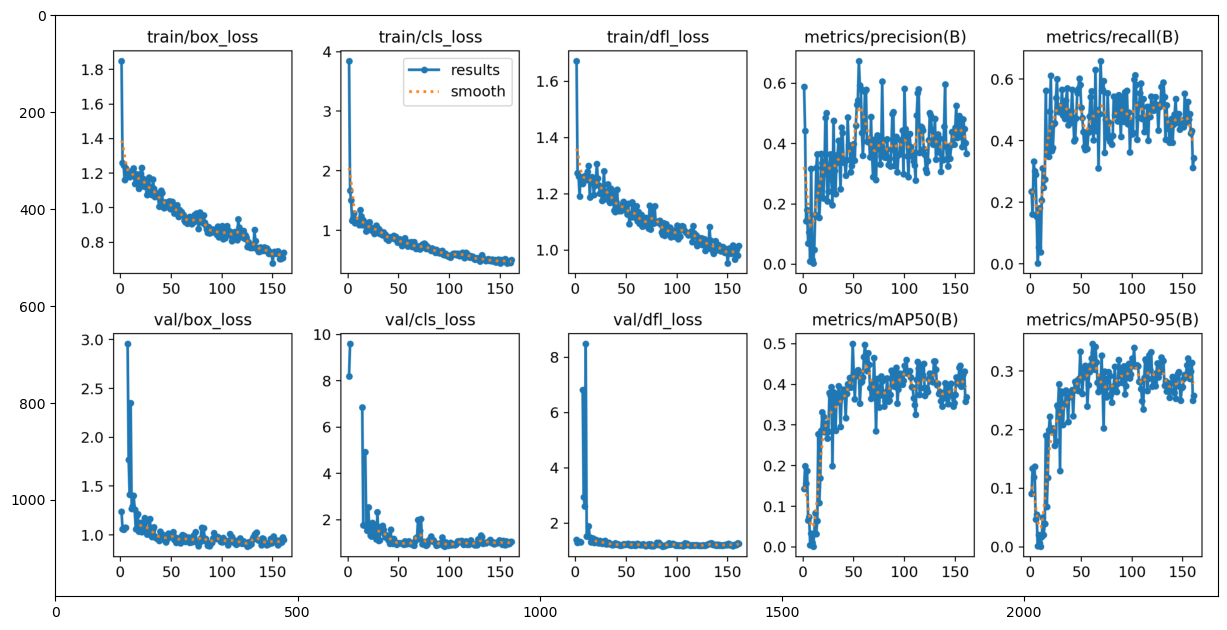

In [7]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

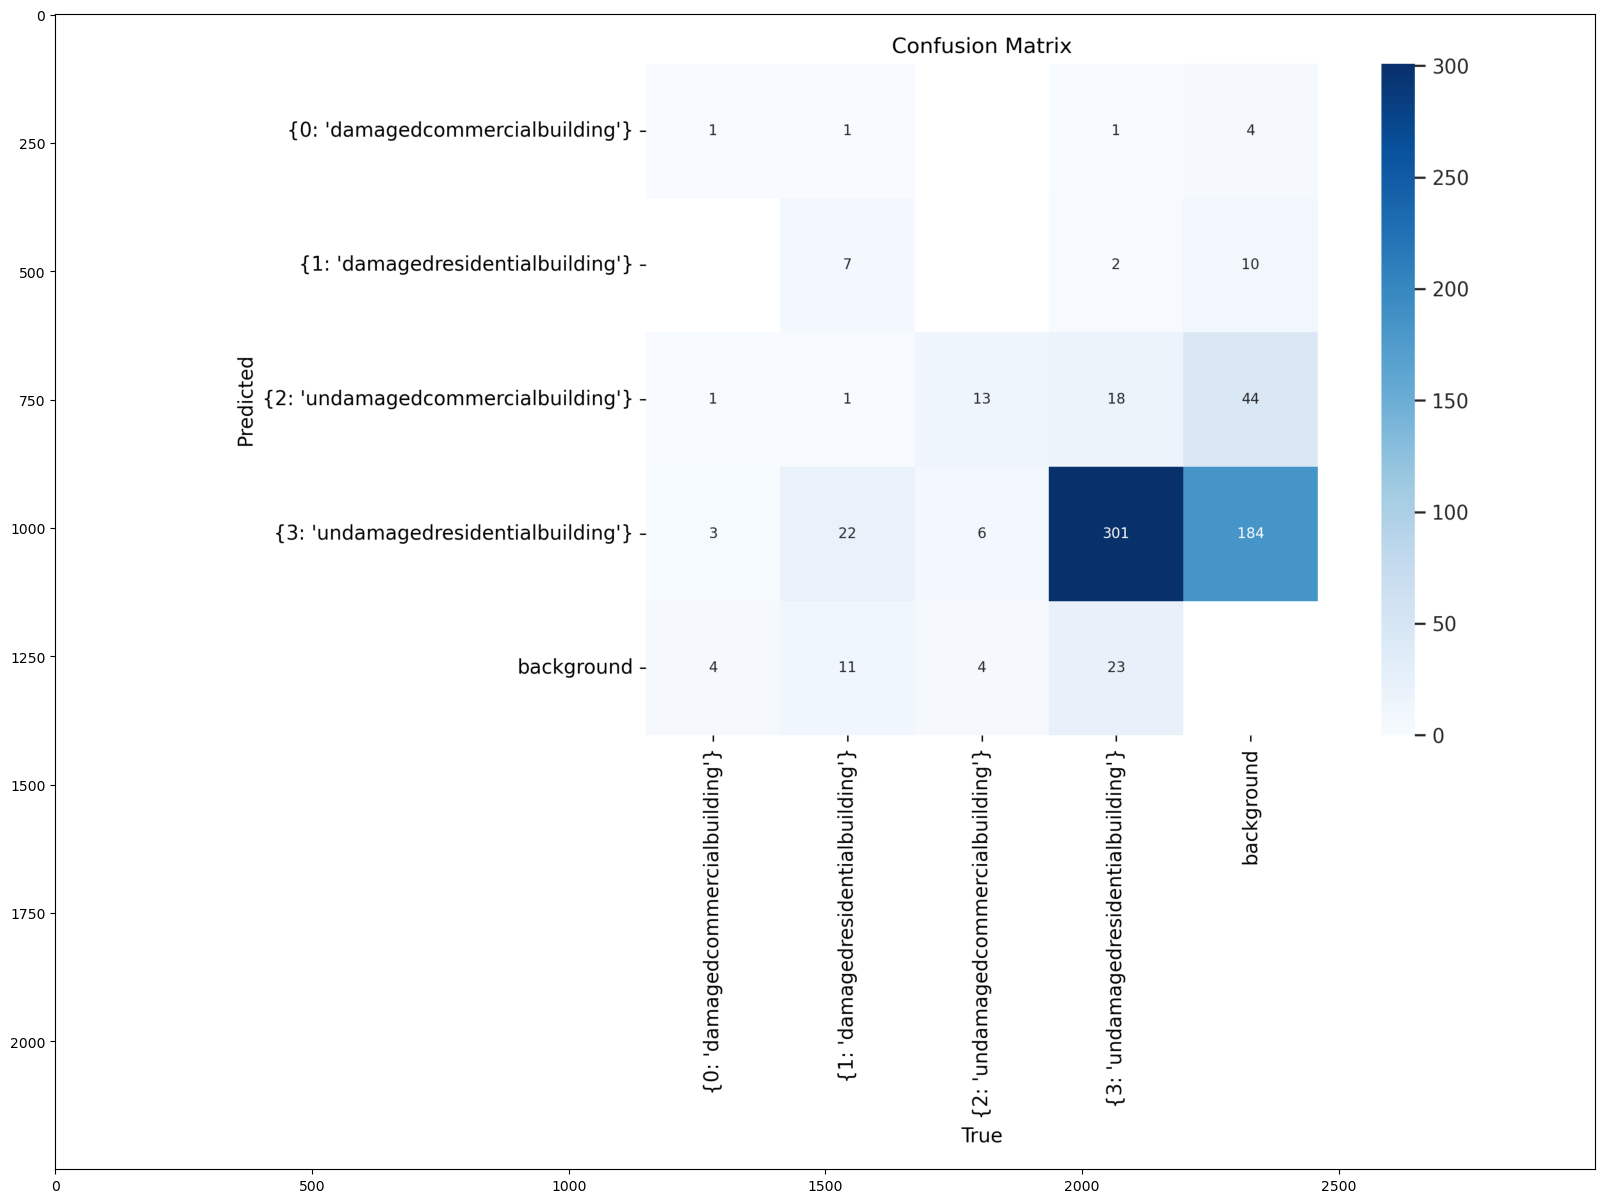

In [8]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf) 
plt.show()

## Testing

In [9]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [10]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients


val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


                   all         12        234      0.506      0.506      0.472      0.364
{0: 'damagedcommercialbuilding'}         12         15      0.524        0.2      0.321      0.265
{1: 'damagedresidentialbuilding'}         12         42      0.616      0.382      0.458      0.342
{2: 'undamagedcommercialbuilding'}         12         20       0.26        0.6      0.311      0.206
{3: 'undamagedresidentialbuilding'}         12        157      0.623      0.842      0.795      0.643
Speed: 0.2ms preprocess, 28.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/val4


In [11]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 2 {0: 'damagedcommercialbuilding'}s, 3 {1: 'damagedresidentialbuilding'}s, 4 {2: 'undamagedcommercialbuilding'}s, 28 {3: 'undamagedresidentialbuilding'}s, 41.8ms
image 2/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 2 {1: 'damagedresidentialbuilding'}s, 14 {3: 'undamagedresidentialbuilding'}s, 41.9ms
image 3/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 1 {0: 'damagedcommercialbuilding'}, 3 {1: 'damagedresidentialbuilding'}s, 2 {2: 'undamagedcommercialbuilding'}s, 11 {3: 'undamagedresidentialbuilding'}s, 36.3ms
image 4/12 /home/jovyan/storm-damage-detecti

In [12]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [13]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source /home/jovyan/storm-damage-detection/runs/yolov8l-default/submission_data
dest /home/jovyan/storm-damage-detection/runs/yolov8l-default/submission
Directory /home/jovyan/storm-damage-detection/runs/yolov8l-default/submission_data has been successfully zipped into /home/jovyan/storm-damage-detection/runs/yolov8l-default/submission.
